In [582]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.io import arff
import urllib.request
import io
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import csv

In [195]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

In [196]:
url_test = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [197]:
response_test = urllib.request.urlopen(url_test)
test_data = response_test.read().decode('utf-8')

In [198]:
column_names = "age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result\n"

In [199]:
test_data = ''.join(test_data.splitlines(keepends=True)[1:])

In [200]:
test_data = column_names + test_data

In [201]:
test_data = io.StringIO(test_data)
test_data = pd.read_csv(test_data)
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [202]:
response = urllib.request.urlopen(url)
dataset = response.read().decode('utf-8')

In [203]:
dataset = column_names + dataset

In [204]:
dataset = io.StringIO(dataset)

In [205]:
df = pd.read_csv(dataset)

In [634]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  result          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [208]:
# Missing Values
na_features = [feature for feature in df.columns if df[feature].isnull().sum()>1]

In [209]:
na_features

[]

In [633]:
## Education column can be dropped
## As evident from the plots below; education-num and education give us the same plot

<AxesSubplot:xlabel='education-num,result'>

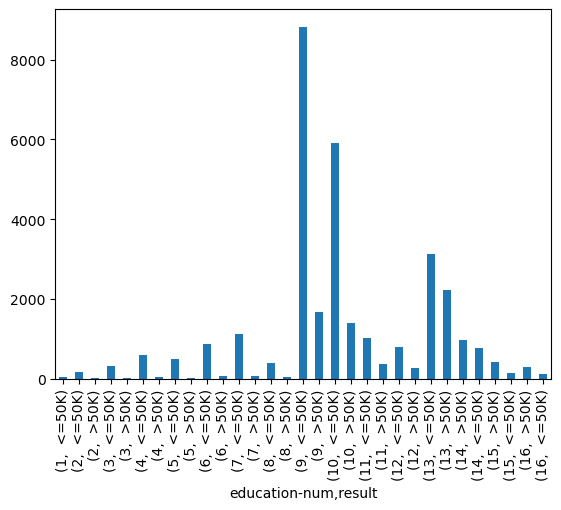

In [210]:
df.groupby('education-num')['result'].value_counts().plot.bar()

<AxesSubplot:xlabel='education,result'>

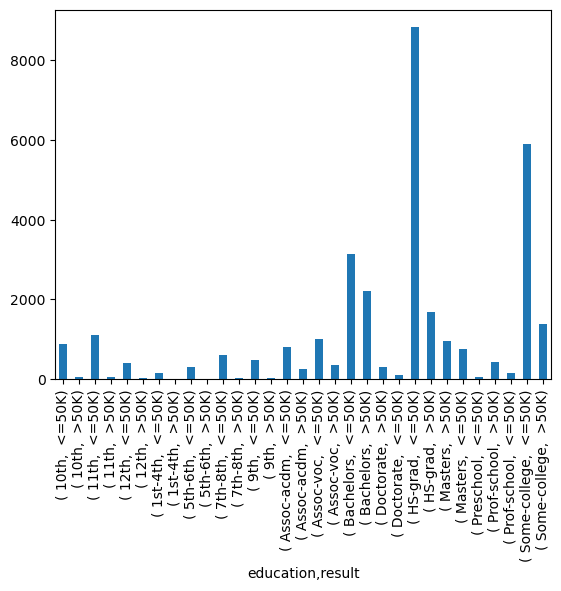

In [211]:
df.groupby('education')['result'].value_counts().plot.bar()

In [97]:
temp_ed_num = pd.crosstab(index=df['education-num'], columns=df['result'])

<AxesSubplot:xlabel='education-num'>

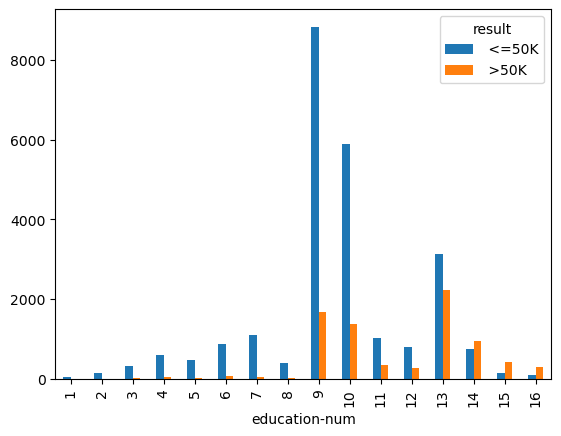

In [98]:
temp_ed_num.plot.bar()

In [212]:
temp_ed = pd.crosstab(index=df['education'], columns=df['result'])

<AxesSubplot:xlabel='education'>

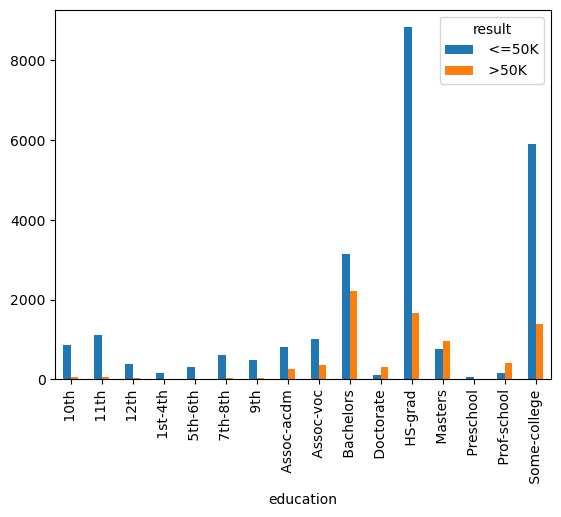

In [213]:
temp_ed.plot.bar()

In [214]:
df = df.drop(columns=['education'])


In [215]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [216]:
## Numerical Features
numerical_features = [feature for feature in df.columns if (df[feature].dtypes != 'O' and len(df[feature].unique())>119)]

In [217]:
numerical_features 

['fnlwgt']

In [218]:
discrete_features = [feature for feature in df.columns if df[feature].dtypes != 'O' and len(df[feature].unique())<120]

In [219]:
discrete_features

['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [220]:
categorical_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

In [221]:
categorical_features

['workclass',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'result']

In [222]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [223]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [228]:
#UniVariate



32561

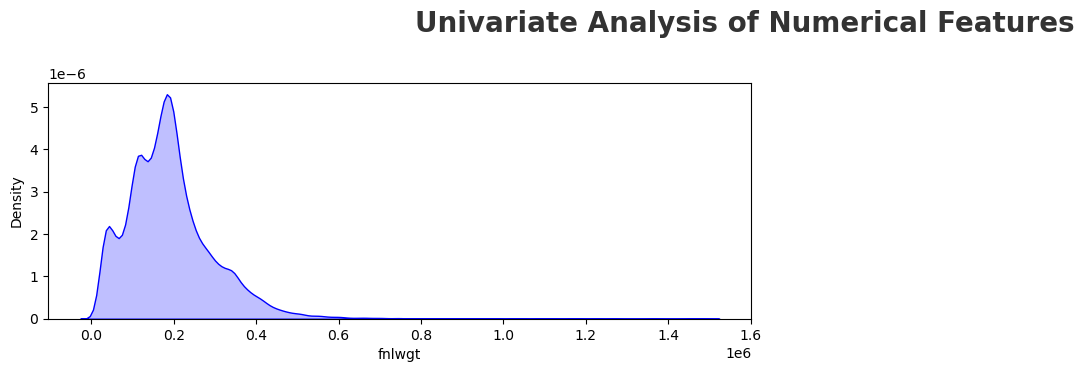

In [229]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='b')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

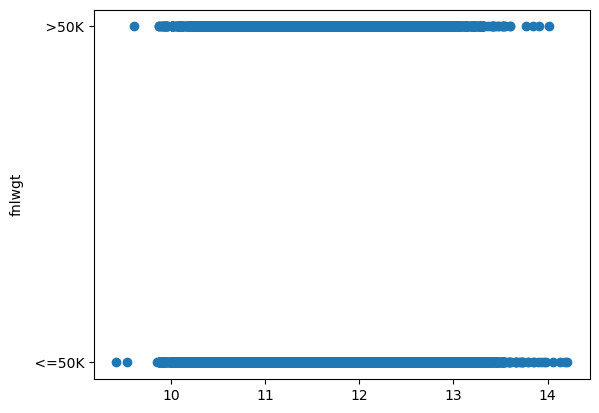

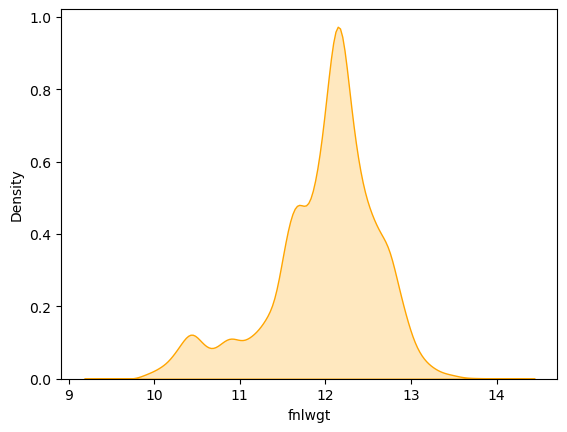

In [542]:
data = df.copy()
for feature in numerical_features:
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
#         plt.subplot(5,3, )
        plt.scatter(data[feature], data['result'])
        
        plt.ylabel(feature)
        plt.show()
        sns.kdeplot(x=data[feature], shade=True, color='orange')
        plt.show()

In [544]:
data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,11.258240,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,11.330336,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,12.281393,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,12.366153,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,12.732011,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:xlabel='fnlwgt', ylabel='Density'>

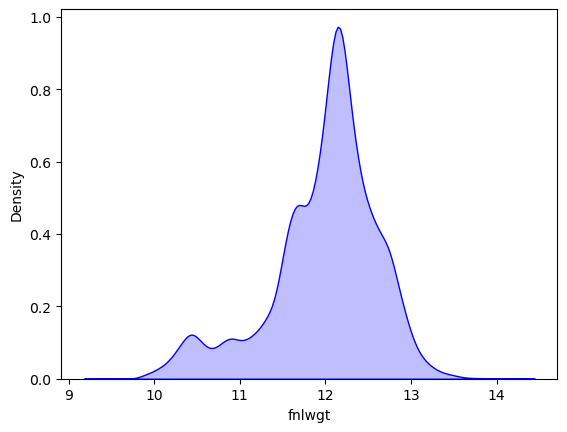

In [126]:
sns.kdeplot(x=fnl_log,shade=True, color='b')

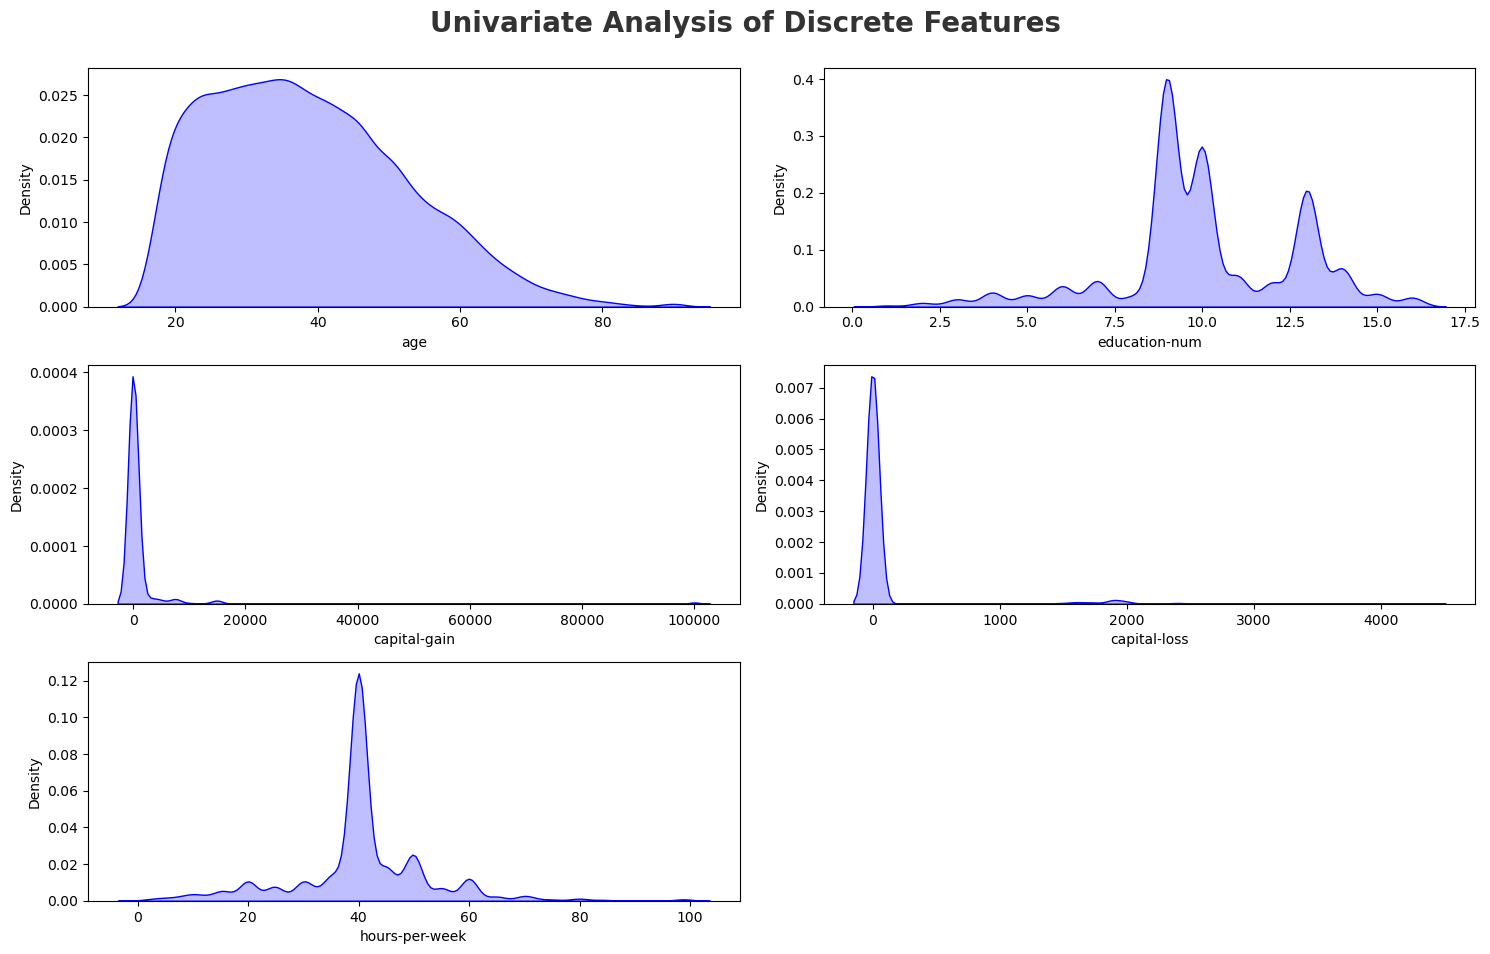

In [232]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Discrete Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(discrete_features)):
    plt.subplot(5, 2, i+1)
    sns.kdeplot(x=df[discrete_features[i]],shade=True, color='b')
    plt.xlabel(discrete_features[i])
    plt.tight_layout()
    

In [ ]:
## {1-> Preschool, 2-> 1st-4th, 3-> 5th-6th, 4-> 7th-8th, 5-> 9th, 6-> 10th, 7-> 11th, 8-> 12th, 9-> HS-grad, 10-> Some-College, 
## 11-> Assoc-voc, 12-> Assoc-acdm, 13-> Bachelors, 14-> Masters, 15-> Prof-school, 16-> Doctorate}

In [270]:
ednum = df['education-num'].value_counts()

In [277]:
ednum = ednum.sort_index()

In [278]:
ednum

1        51
2       168
3       333
4       646
5       514
6       933
7      1175
8       433
9     10501
10     7291
11     1382
12     1067
13     5355
14     1723
15      576
16      413
Name: education-num, dtype: int64

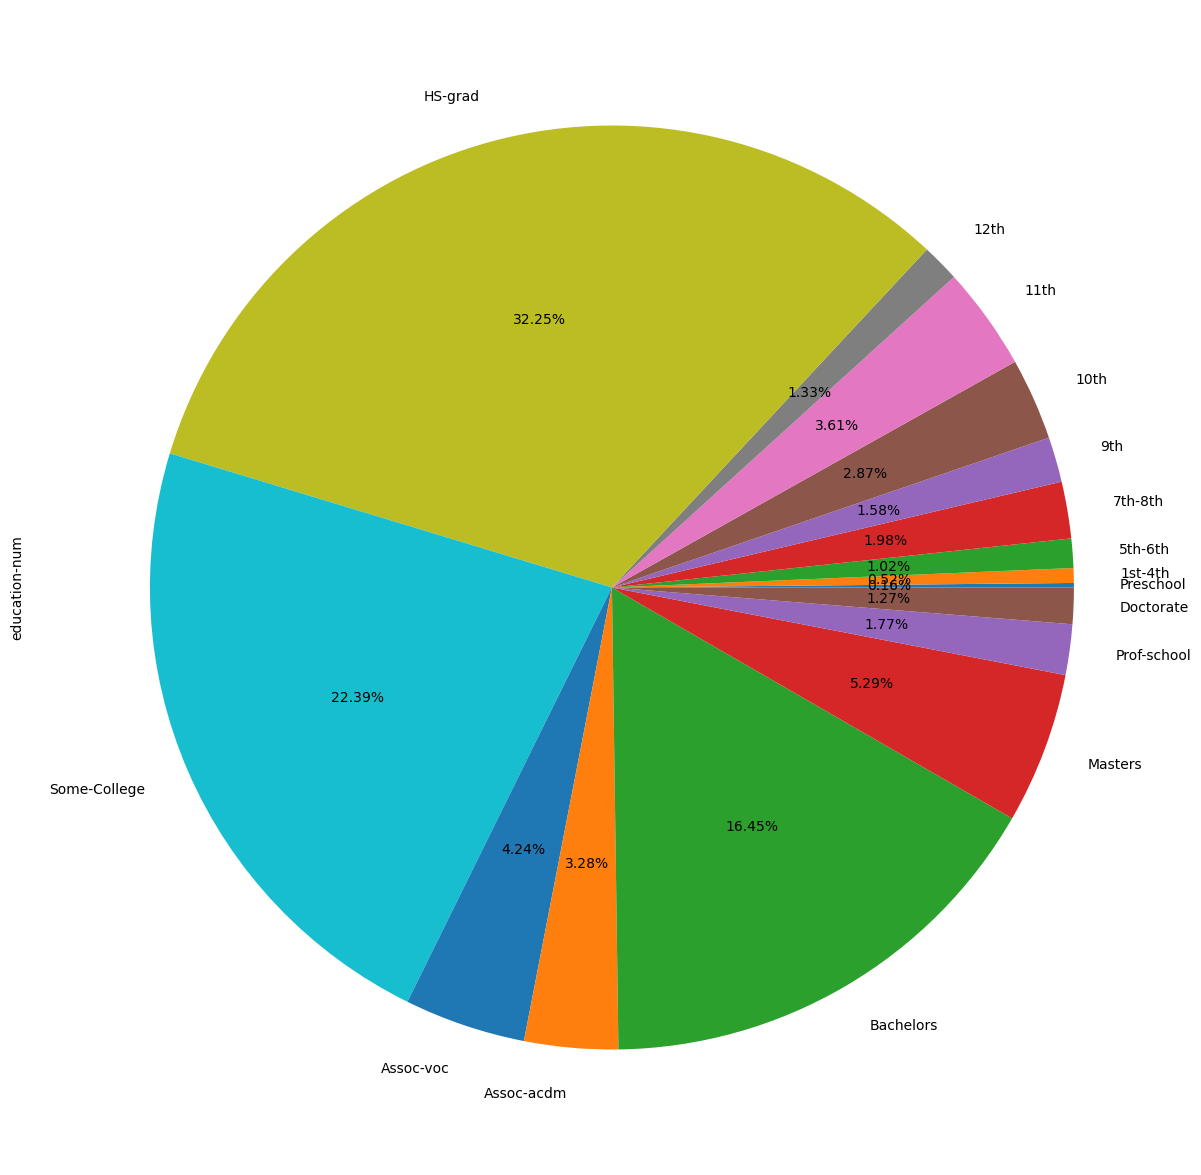

In [280]:
labels=['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-College', 'Assoc-voc', 'Assoc-acdm', 'Bachelors', 'Masters', 'Prof-school', 'Doctorate']
ednum.plot.pie(y=df['age'], figsize=(25,15), autopct='%1.2f%%', labels=labels)
plt.show()

In [281]:
df['education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education-num, dtype: int64

In [329]:
df_ed_inc = pd.crosstab(df['education-num'], df['result'])

In [326]:
#df_ed_inc = df_ed_inc.sort_values([' <=50K', ' >50K'], ascending=False)

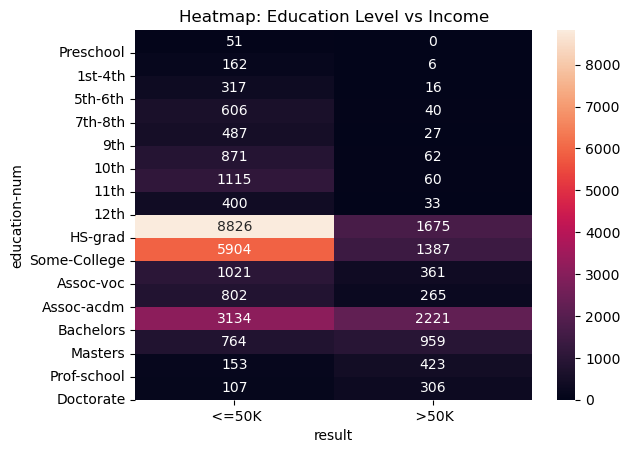

In [343]:
sns.heatmap(df_ed_inc, annot=True, fmt='.4g')
plt.yticks(ticks=np.arange(1,17,1), labels=labels, rotation = 0)
plt.title("Heatmap: Education Level vs Income")
plt.show()

In [344]:
df_age_inc = pd.crosstab(df['age'], df['result'])
df_age_inc

result,<=50K,>50K
age,,
17,395,0
18,550,0
19,710,2
20,753,0
21,717,3
...,...,...
85,3,0
86,1,0
87,1,0


Text(0.5, 0, 'Number of people (having >50K Income) ')

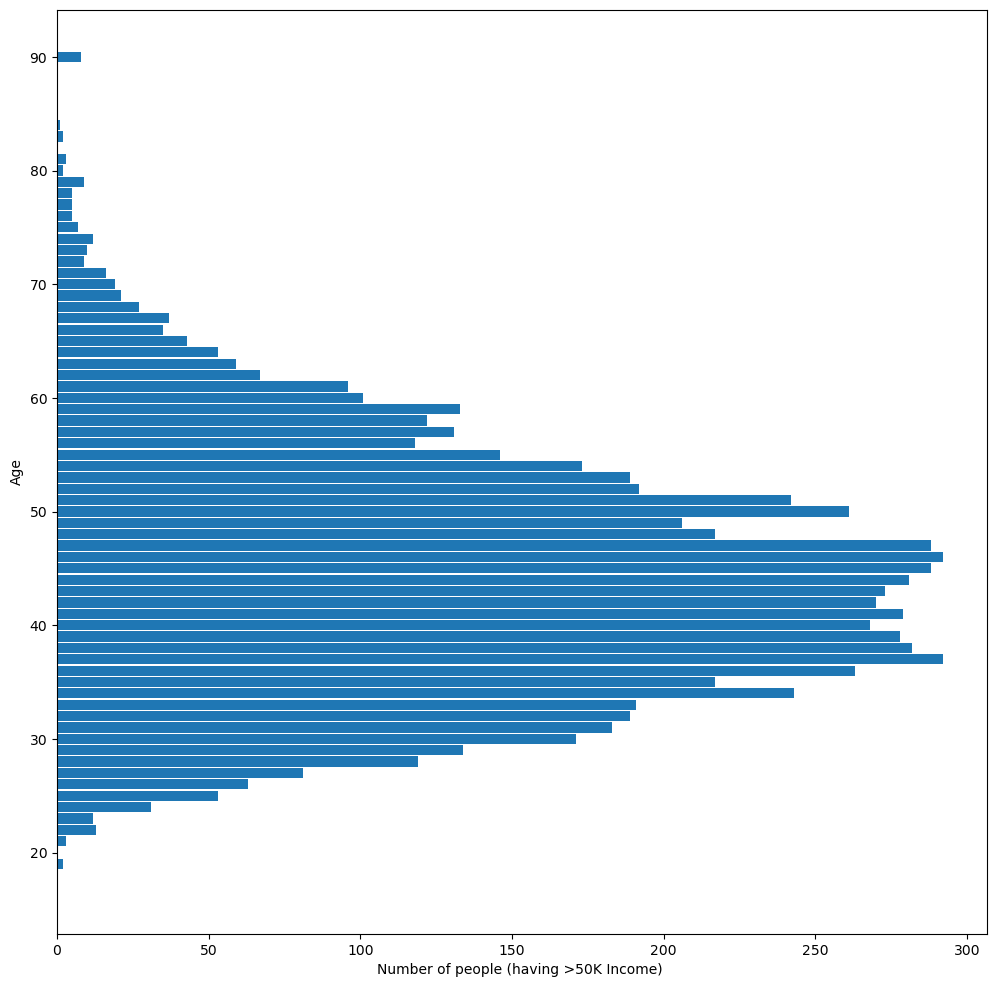

In [430]:
plt.figure(figsize=(12,12))
plt.barh(df_age_inc.index, df_age_inc[' >50K'], height=0.9)
plt.ylabel('Age')
plt.xlabel("Number of people (having >50K Income) ")



In [463]:
# number of people with age range 50-60 having income >50K or <=50K
df_50_age = df.where((df['age'] >= 50))
df_50_age = df_50_age.where((df_50_age['age'] < 60))
df_50_age = df_50_age[['age', 'result']].dropna()

In [464]:
df_50_age

,age,result
1,50.0,<=50K
3,53.0,<=50K
7,52.0,>50K
21,54.0,<=50K
24,59.0,<=50K
...,...,...
32522,58.0,<=50K
32533,54.0,>50K
32554,53.0,>50K
32558,58.0,<=50K


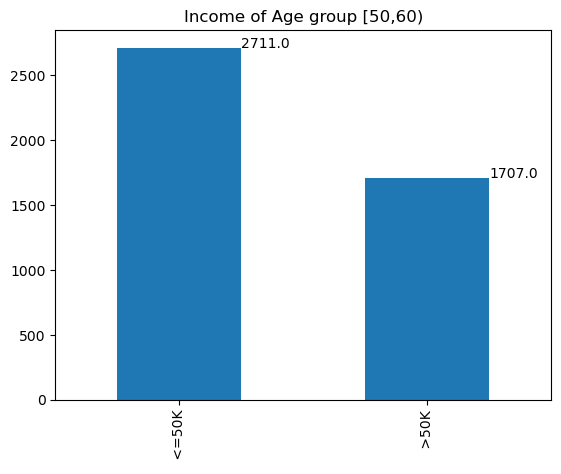

In [475]:
ax=df_50_age['result'].value_counts().plot.bar()
plt.title("Income of Age group [50,60)")
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.5, p.get_height()+3))


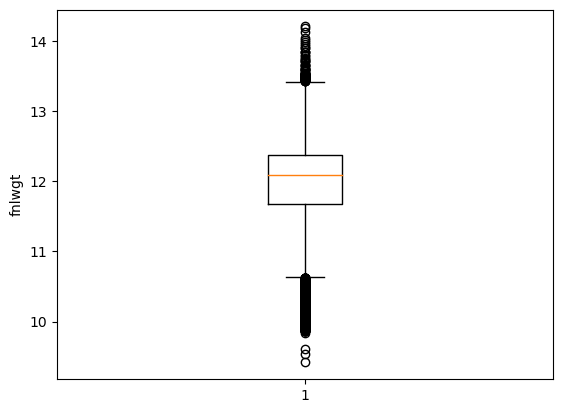

In [478]:
dict_boxplt=plt.boxplot(fnl_log)
plt.ylabel('fnlwgt')
plt.show()

In [485]:
fliers=dict_boxplt['fliers']

In [496]:
x,y=fliers[0].get_data()

In [503]:
print(f'Number of outliers in fnlwgt variable are: {len(x)}')

Number of outliers in fnlwgt variable are: 1823


In [507]:
df_rac_inc = pd.crosstab(df['race'], df['result'])

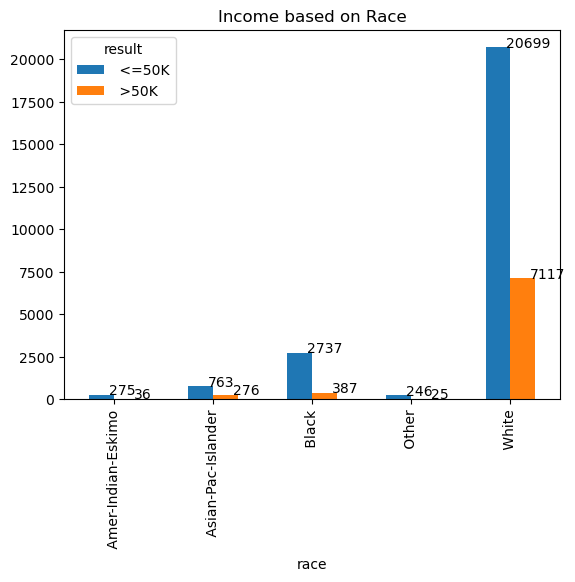

In [514]:
ax=df_rac_inc.plot.bar()
plt.title("Income based on Race")
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+3))

In [515]:
df_sex_inc = pd.crosstab(df['sex'], df['result'])

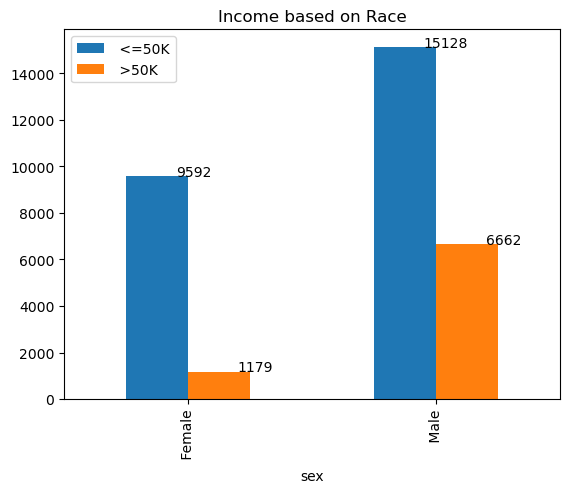

In [520]:
ax=df_sex_inc.plot.bar()
plt.title("Income based on Race")
plt.legend(loc='upper left')
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+3))

In [522]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [523]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [524]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [525]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [540]:
for feature in categorical_features:
    print(f'{feature}: {df[feature].value_counts()}')

workclass:  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
marital-status:  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64
occupation:  Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype:

In [541]:
df.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<AxesSubplot:xlabel='native-country'>

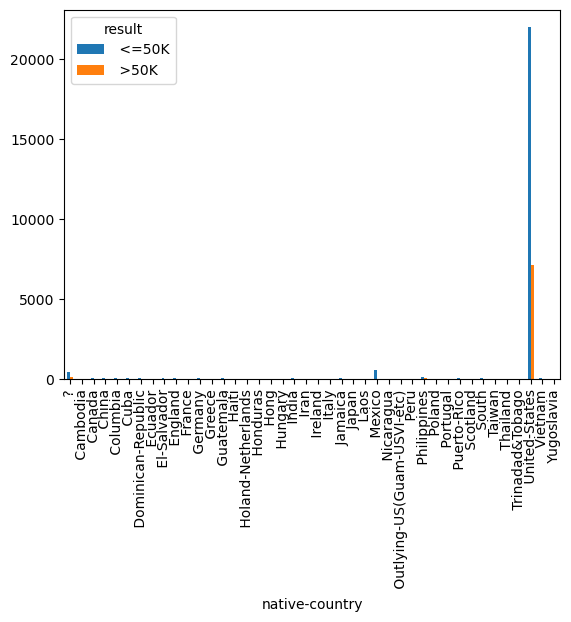

In [535]:
pd.crosstab(df['native-country'], df['result']).plot.bar()

In [537]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [ ]:
## One-hot encoding the sex variable

In [552]:
data['Male'] = pd.get_dummies(data['sex'], drop_first=True)
data=data.drop(columns=['sex'])

In [553]:
data.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,result,Male
0,39,State-gov,11.258240,13,Never-married,Adm-clerical,Not-in-family,White,2174,0,40,United-States,<=50K,1
1,50,Self-emp-not-inc,11.330336,13,Married-civ-spouse,Exec-managerial,Husband,White,0,0,13,United-States,<=50K,1
2,38,Private,12.281393,9,Divorced,Handlers-cleaners,Not-in-family,White,0,0,40,United-States,<=50K,1
3,53,Private,12.366153,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,0,0,40,United-States,<=50K,1
4,28,Private,12.732011,13,Married-civ-spouse,Prof-specialty,Wife,Black,0,0,40,Cuba,<=50K,0


In [ ]:
## Converting rare categories to a single category 'Other'

In [555]:
for feature in categorical_features:
    if feature not in ['sex']:
        temp = data.groupby(feature)['result'].count()/len(data)
        temp_data = temp[temp>0.01].index
        data[feature] = np.where(data[feature].isin(temp_data), data[feature], 'Other')

In [558]:
for feature in categorical_features:
     if feature not in ['sex']:
        print(f'{feature}: {data[feature].value_counts()}')

workclass:  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
Other                   21
Name: workclass, dtype: int64
marital-status:  Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
Other                        23
Name: marital-status, dtype: int64
occupation:  Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
Other                  158
Name: occupation, dtype: int64
relationship:  Husband           13193
 Not-in-

In [ ]:
## Label Encoding the dependent variable 
### 0 means <=50K
### 1 means >50K

In [560]:
label_encoder = LabelEncoder()

In [576]:
data['Income'] = label_encoder.fit_transform(data['result'])
data=data.drop(columns=['result'])

In [574]:
## Label Encoding remaining Categorical features

In [ ]:
for feature in categorical_features:
    if feature not in ['sex', 'result']:
        data['le_' + feature] = label_encoder.fit_transform((data[feature]))
        data = data.drop(columns=[feature])

In [580]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Male,Income,le_workclass,le_marital-status,le_occupation,le_relationship,le_race,le_native-country
0,39,11.258240,13,2174,0,40,1,0,6,3,1,1,2,2
1,50,11.330336,13,0,0,13,1,0,5,1,3,0,2,2
2,38,12.281393,9,0,0,40,1,0,3,0,5,1,2,2
3,53,12.366153,7,0,0,40,1,0,3,1,5,0,1,2
4,28,12.732011,13,0,0,40,0,0,3,1,8,5,1,3


In [588]:
## Feature Scaling

In [ ]:
scaler = MinMaxScaler(feature_range=(5,10))

In [589]:
scaled_features

['fnlwgt',
 'age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [591]:
data[scaled_features] = scaler.fit_transform(data[scaled_features].values)

In [592]:
data.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Male,Income,le_workclass,le_marital-status,le_occupation,le_relationship,le_race,le_native-country
0,6.506849,6.921024,9.000000,5.108701,5.0,6.989796,1,0,6,3,1,1,2,2
1,7.260274,6.996209,9.000000,5.000000,5.0,5.612245,1,0,5,1,3,0,2,2
2,6.438356,7.988011,7.666667,5.000000,5.0,6.989796,1,0,3,0,5,1,2,2
3,7.465753,8.076402,7.000000,5.000000,5.0,6.989796,1,0,3,1,5,0,1,2
4,5.753425,8.457933,9.000000,5.000000,5.0,6.989796,0,0,3,1,8,5,1,3


In [ ]:
# Cleaning Test Data

In [594]:
test_data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K.
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [595]:
test_data = test_data.drop(columns=['education'])

In [597]:
test_data['Male'] = pd.get_dummies(test_data['sex'], drop_first=True)
test_data=test_data.drop(columns=['sex'])

In [598]:
test_data

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,result,Male
0,25,Private,226802,7,Never-married,Machine-op-inspct,Own-child,Black,0,0,40,United-States,<=50K.,1
1,38,Private,89814,9,Married-civ-spouse,Farming-fishing,Husband,White,0,0,50,United-States,<=50K.,1
2,28,Local-gov,336951,12,Married-civ-spouse,Protective-serv,Husband,White,0,0,40,United-States,>50K.,1
3,44,Private,160323,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,7688,0,40,United-States,>50K.,1
4,18,?,103497,10,Never-married,?,Own-child,White,0,0,30,United-States,<=50K.,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,13,Divorced,Prof-specialty,Not-in-family,White,0,0,36,United-States,<=50K.,0
16277,64,?,321403,9,Widowed,?,Other-relative,Black,0,0,40,United-States,<=50K.,1
16278,38,Private,374983,13,Married-civ-spouse,Prof-specialty,Husband,White,0,0,50,United-States,<=50K.,1
16279,44,Private,83891,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,5455,0,40,United-States,<=50K.,1


In [599]:
for feature in categorical_features:
    if feature not in ['sex']:
        temp = test_data.groupby(feature)['result'].count()/len(test_data)
        temp_data = temp[temp>0.01].index
        test_data[feature] = np.where(test_data[feature].isin(temp_data), test_data[feature], 'Other')

In [600]:
test_data['Income'] = label_encoder.fit_transform(test_data['result'])
test_data=test_data.drop(columns=['result'])

In [601]:
for feature in categorical_features:
    if feature not in ['sex', 'result']:
        test_data['le_' + feature] = label_encoder.fit_transform((test_data[feature]))
        test_data = test_data.drop(columns=[feature])

In [602]:
test_data[scaled_features] = scaler.fit_transform(test_data[scaled_features].values)

In [603]:
test_data

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,Male,Income,le_workclass,le_marital-status,le_occupation,le_relationship,le_race,le_native-country
0,5.547945,5.722151,7.000000,5.000000,5.0,6.989796,1,0,3,3,6,3,1,2
1,6.438356,5.258384,7.666667,5.000000,5.0,7.500000,1,0,3,1,4,0,2,2
2,5.753425,6.095055,8.666667,5.000000,5.0,6.989796,1,1,2,1,9,0,2,2
3,6.849315,5.497089,8.000000,5.384404,5.0,6.989796,1,1,3,1,6,0,1,2
4,5.068493,5.304708,8.000000,5.000000,5.0,6.479592,0,0,0,3,0,3,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,6.506849,5.683614,9.000000,5.000000,5.0,6.785714,0,0,3,0,8,1,2,2
16277,8.219178,6.042418,7.666667,5.000000,5.0,6.989796,1,0,0,5,0,2,1,2
16278,6.438356,6.223810,9.000000,5.000000,5.0,7.500000,1,0,3,1,8,0,2,2
16279,6.849315,5.238332,9.000000,5.272753,5.0,6.989796,1,0,3,0,1,3,0,2


# Train-Test Split

In [ ]:
y_train = data[['Income']]
X_train = data.drop(columns=['Income'])


In [608]:
y_test = test_data[['Income']]
X_test = test_data.drop(columns=['Income']) 

# Training

In [612]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

In [613]:
rand_clf = RandomForestClassifier(criterion='gini', verbose=1, n_estimators=100, random_state=1)
rand_clf.fit(X_train, y_train)

C:\Users\840 G3\AppData\Local\Temp\ipykernel_5732\1021784539.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rand_clf.fit(X_train, y_train)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    3.9s finished


RandomForestClassifier(random_state=1, verbose=1)

In [615]:
y_pred_rand = rand_clf.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.3s finished


In [617]:
accuracy_score(y_test, y_pred_rand)

0.8420858669614889

In [618]:
#SVM

In [631]:
svm_clf = SVC(C=3.0, kernel='poly', degree=5)

In [ ]:
svm_clf.fit(X_train, y_train)

In [ ]:
y_pred_svm = svm_clf.predict(X_test)

In [630]:
accuracy_score(y_test, y_pred_svm)

0.8439899269086666